In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

sns.set()
%matplotlib inline

### Generate Data

Text(0.5,1,'Test Data')

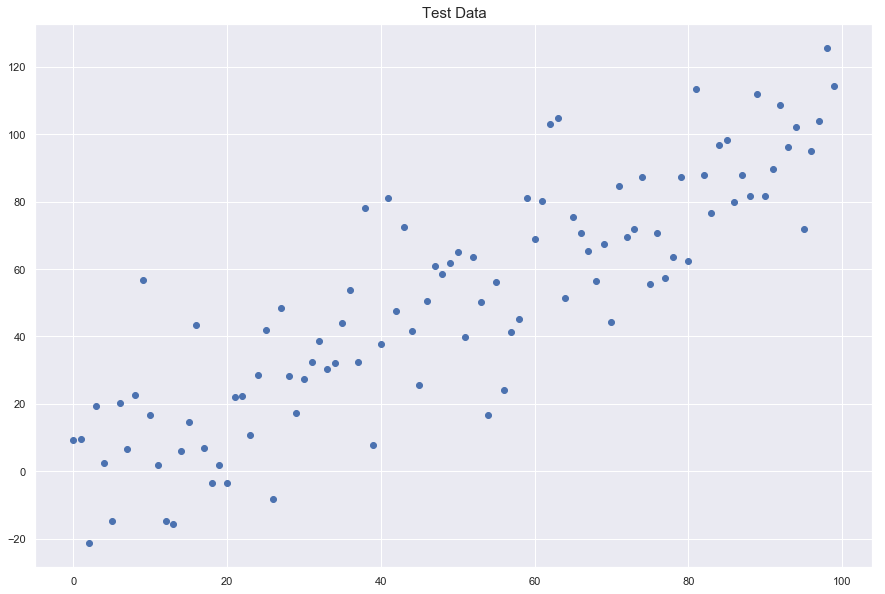

In [12]:
# Number of points
data_points = 100

# Add noise
dispersion = np.random.randint(low = 5, high = 30)

# Define X & Y
x_test = np.arange(data_points)
y_test = dispersion * np.random.randn(data_points) + x_test 

plt.figure(figsize = (15,10))
plt.scatter(x_test,y_test)
plt.title("Test Data", fontsize = 15)

### Define Loss Function

In [13]:
# Mean Squared Error (MSE)
def error_sum(x, y, slope, intercept):
        return sum((y - slope * x - intercept)**2)

In [17]:
def guess_line(slope, intercept):
    x = np.arange(100)
    y = x * slope + intercept
    plt.figure(figsize = (15,10))
    plt.ylim([-20,200])
    plt.xlim([-5,100])
    
    # Show Equation of Line
    plt.text(10, 85, s = "y = {}*x + {}".format(slope,intercept), fontsize = 15)
    
    # Call Loss Function
    plt.text(10, 75, s = "Error = {:.0f}".format(error_sum(x_test,y_test,slope,intercept)), fontsize = 15)
    
    # Plot Graph
    plt.title("Line of Best Fit Visualization", fontsize = 15)
    plt.plot(x,y, 'r')
    plt.scatter(x_test,y_test)
    plt.show()

interact(guess_line, slope = (0,2,0.1), intercept  = (0,20))

interactive(children=(FloatSlider(value=1.0, description='slope', max=2.0), IntSlider(value=10, description='i…

<function __main__.guess_line(slope, intercept)>

### Gradient Descent

In [15]:
## Find optimal values using gradient descent
n = len(x_test)

#Number dependent on learning rate
epochs = 10

#Very sensitive to this number - anything larger and it will not converge
learning_rate = 0.0001

#Set initial values
m_guess = 0
b_guess = 0

#Store values
guesses = np.zeros((epochs,2))


for x in range(epochs):
    y_new = (m_guess * x_test) + b_guess
    
    # Take derivative of loss function with respect to slope and intercept
    m_grad = -2/n *  sum(x_test * (y_test - y_new))
    b_grad = -2/n *  sum(y_test - y_new)
    
    #Update guess of slope and intercept
    m_guess -= (learning_rate * m_grad)
    b_guess -= (learning_rate * b_grad)
    
    #Store iterated values of slope and intercept (only need for next visualization)
    guesses[x] = [m_guess, b_guess]
 

### Plot Gradient Descent

Text(0.5,1,'Gradient Decent')

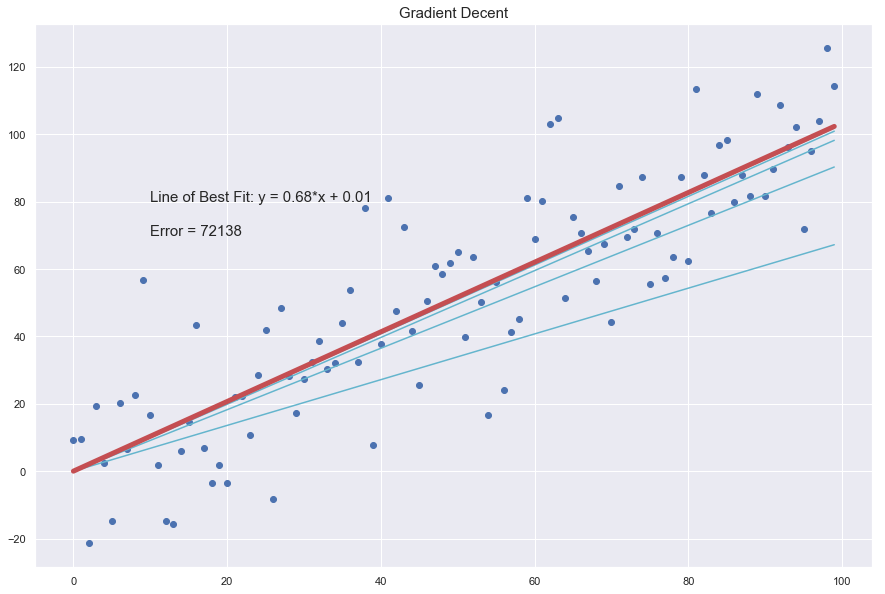

In [22]:
plt.figure(figsize = (15,10))
plt.scatter(x_test,y_test)

## Loop through updated values (slope & intercept)
for i in range(len(guesses)-1):
    plt.plot(x_test * guesses[i][0] + guesses[i][1], 'c')

# Show Best Line
plt.plot(x_test* guesses[-1][0] + guesses[-1][1], 'r', linewidth = 5)

## Get Final Value
best_m = guesses[-epochs][0]
best_b = guesses[-epochs][1]


plt.text(10, 80, s = "Line of Best Fit: y = {:.2f}*x + {:.2f}".format(best_m, best_b ), fontsize = 15)
plt.text(10, 70, s = "Error = {:.0f}".format(error_sum(x_test,y_test, best_m, best_b)), fontsize = 15)
plt.title("Gradient Decent", fontsize = 15)

Text(0.5,1,'Error Function')

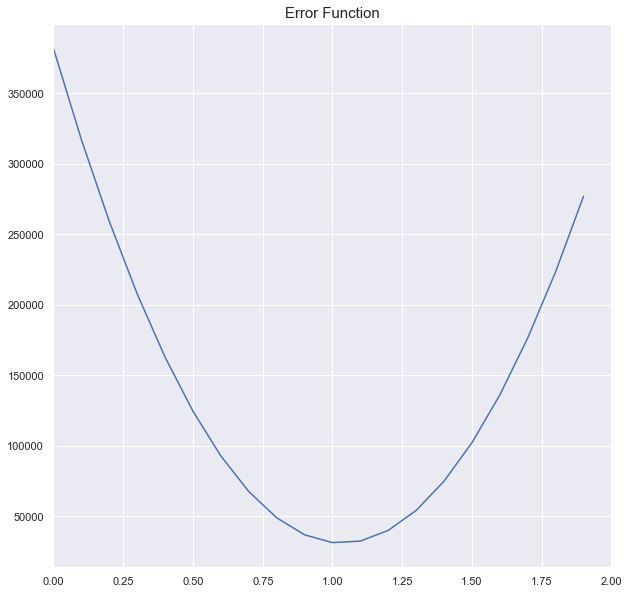

In [30]:
## Visualization of error minimization as a function of slope
y_error = []
x_error = np.arange(0,2,0.1)
for x in x_error:
    y_error.append(error_sum(x_test,y_test, x, 0))

    

plt.figure(figsize = (10,10))
plt.xlim([-0,2])
plt.plot(x_error,y_error)
#plt.plot(guesses)
plt.title("Error Function", fontsize = 15)

In [31]:
guesses

array([[0.67904788, 0.01019612],
       [0.91206407, 0.01366762],
       [0.99202416, 0.01483157],
       [1.01946294, 0.01520368],
       [1.02887899, 0.01530407],
       [1.03211052, 0.01531122],
       [1.03321984, 0.01528638],
       [1.03360091, 0.01525057],
       [1.03373209, 0.01521098],
       [1.03377751, 0.01517011]])

In [ ]:
for val in guesses 
    error_sum(x_test,y_test, best_m, best_b)